## Background

In this project, we train two agents to play tennis by bouncing a ball over a net.  

![Tennis](https://user-images.githubusercontent.com/10624937/42135623-e770e354-7d12-11e8-998d-29fc74429ca2.gif)

If an agent hits the ball over the net, it receives a reward of +0.1. If an agent lets a ball hit the ground or hits 
the ball out of bounds, it receives a reward of -0.01. As such, the goal of each agent is to keep the ball in play.   

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. 
Each agent receives its own, local observation. Two continuous actions are available, corresponding to movement toward 
(or away from) the net, and jumping.

The task is episodic, and in order to solve the environment, the agent must get an average score of +30 over 100 consecutive episodes.
For more details about the algorithms and the implementation, please see the files "Continuous_Control.ipynb" and "Report.ipynb".

The task is episodic, and in order to solve the environment, our agents must get an average score of +0.5 
(over 100 consecutive episodes, after taking the maximum over both agents). Specifically, after each episode, we add up 
the rewards that each agent received (without discounting), to get a score for each agent. This yields 2 (potentially 
different) scores. We then take the maximum of these 2 scores. This yields a single score for each episode.    

The environment is considered solved, when the average (over 100 episodes) of those scores is at least +0.5.


## Algorithm

To train the agent, we use the DDPG algorithm introduced in [this](https://arxiv.org/abs/1509.02971) and [this](https://proceedings.neurips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf) papers.  

To train an agent using DDPG, we need the following components:

- **Environment**: The environment here is provided to us using Unity ML. To interact/integrate with the environment, we need to get familiar with the python API. This has been explained in the Tennis.ipynb.


- **Agent**: These are the players in the Tennis environment that we control. The agents should be able to take an action given a state and also learn as they interact with the environment. The agents have been implemented using the class "Agent" in the "ddpg_agent.py" module. To train the agent, we use the following hyperparameters: 


    + BUFFER_SIZE = int(1e6)  # replay buffer size
    + BATCH_SIZE = 128        # minibatch size
    + GAMMA = 0.99            # discount factor
    + TAU = 1e-3              # for soft update of target parameters
    + LR_ACTOR = 1e-4         # learning rate of the actor
    + LR_CRITIC = 1e-4        # learning rate of the critic
    + WEIGHT_DECAY = 0        # L2 weight decay


- **Actor Local and Actor Target Netwroks**: These are our first group of deep neural networks (actor netwroks) that translate a state vactor to an action vector. Our action vector here has a size of 2 with values between -1 and +1 (hence the need for using tanh activation fucntion at the end). Both local and target networks will have identical archituctures. The deep learning model has been implemented in the model.py module. Here, we are using a relatively simple architucture with two fully connected hidden layers (each with 256 neurons) and relu activation functions. The last layer goes through a tanh activation function because the output needs to be between -1 and 1. 

- **Critic Local and Critic Target Netwroks**: These are our second group of our deep neural networks (critic netwroks) that translate the state vactor plus the action vector (coming from the actor netwrok) to the action value (a single number). Both networks will have identical archituctures. The deep learning model has been implemented in the model.py module. Here, we are using a relatively simple architucture with two fully connected hidden layers (each with 256 neurons) and relu activation functions. To solve this environmet, I used decentralized training and execution. That means, the critic only receives the state and the actions from a single agent as opposed to both agents. I also attempted to use centralized training and decentralized execution in which the critic received the states and actions from both agents. However, I was not able to get agents train in that setting.

- **Replay memory**: This is an array of a fixed length (we use double-ended queue here) that holds the state/action/reward/next_state information used during learning process. The replay memory is implemented using the class "ReplayBuffer" in the "ddpg_agent.py" module.

## Results

To train the agent, we have implemented the function "maddpg" in the Tennis.ipynb. This function trains the agent for a number of episodes and keeps track of the scores. We stop the training process once we achieve an average score of +0.5 over 100 consecutive episodes. 

As it can be seen in the Tennis.ipynb, the agents achieves an average score of 0.5+ in less than 1000 episodes (800 to be more precise), which is relatively quick (see the image below).

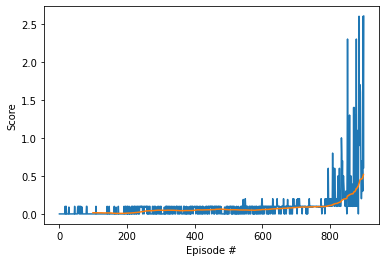

## Future work

DDPG is one out of several algorithms that can be used to solve this environment. In fact, DDPG does not seem to be the most stable algorithm because of its sensitivity to the hyperparameters. For the future work, one may consider using algorithms like Truncated Natural Policy Gradient (TNPG), Trust Region Policy Optimization (TRPO), or Proximal Policy Optimization (PPO). 

Additionally, one should revisit the decentralized training approach to solve this environment. In the end of the day, this is a cooperative environment. I think we are able to solve it because a both agents improve in their skills, the ball stays longer in the game otherwise the trained agents have no sense of cooperation.   